# Homework 1

In [1]:
import numpy as np
import scipy as sp
import networkx as nx
import matplotlib.pyplot as plt

## Exercise 1

Consider the network in Figure with link capacities provided over the links

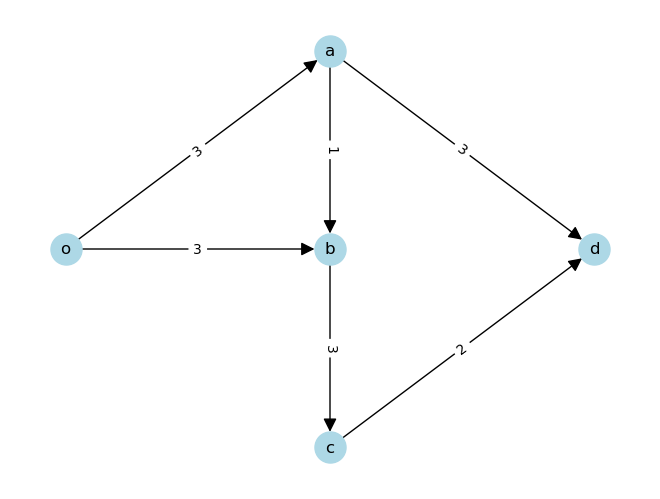

In [2]:
G = nx.DiGraph()

nodes = ['o', 'a', 'b', 'c', 'd']
G.add_nodes_from(nodes)

edges = [
    ('o', 'a', {'capacity': 3}),
    ('a', 'd', {'capacity': 3}),
    ('o', 'b', {'capacity': 3}),
    ('b', 'c', {'capacity': 3}),
    ('c', 'd', {'capacity': 2}),
    ('a', 'b', {'capacity': 1}),
]
G.add_edges_from(edges)

pos = {
    'o': (0, 0),    # Left center
    'a': (1, 1),    # Top middle-left
    'b': (1, 0),    # Center
    'c': (1, -1),   # Bottom middle-right
    'd': (2, 0)     # Top right
}

def draw_capacited_graph(G, pos=pos):
    nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        node_size=500, arrowsize=20)

    edge_labels = nx.get_edge_attributes(G, 'capacity')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

draw_capacited_graph(G)

Compute the capacity of all the cuts and find the minimum capacity to be removed for no
feasible flow from $o$ to $d$ to exist

In [3]:
nx.flow.minimum_cut(G, 'o', 'd') # Also {o, b, c} vs. {a, d}

(5, ({'a', 'b', 'c', 'o'}, {'d'}))

You are given $x > 0$ extra units of capacity $(x ∈ Z)$. How should you distribute them in order
to maximize the throughput that can be sent from $o$ to $d$? Plot the maximum throughput
from o to d as a function of $x ≥ 0$

Increasing edge ('c', 'd') with capacity: 2 by 1...
Increasing edge ('a', 'd') with capacity: 3 by 1...
Increasing edge ('o', 'a') with capacity: 3 by 1...
Increasing edge ('c', 'd') with capacity: 3 by 1...
Increasing edge ('b', 'c') with capacity: 3 by 1...
Increasing edge ('o', 'b') with capacity: 3 by 1...
Increasing edge ('a', 'd') with capacity: 4 by 1...
Increasing edge ('o', 'a') with capacity: 4 by 1...
Increasing edge ('c', 'd') with capacity: 4 by 1...
Increasing edge ('b', 'c') with capacity: 4 by 1...
Increasing edge ('o', 'b') with capacity: 4 by 1...
Increasing edge ('a', 'd') with capacity: 5 by 1...
Increasing edge ('o', 'a') with capacity: 5 by 1...
Increasing edge ('c', 'd') with capacity: 5 by 1...
Increasing edge ('b', 'c') with capacity: 5 by 1...
Increasing edge ('o', 'b') with capacity: 5 by 1...
Increasing edge ('a', 'd') with capacity: 6 by 1...
Increasing edge ('o', 'a') with capacity: 6 by 1...
Increasing edge ('c', 'd') with capacity: 6 by 1...
Increasing e

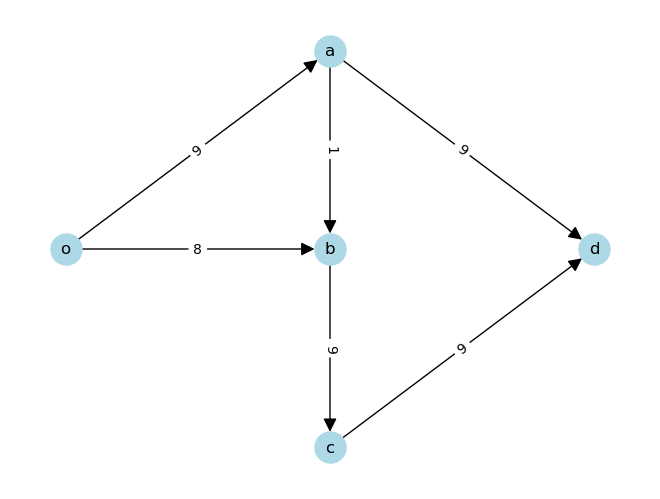

In [4]:
def intervetion(G, x=1):
    for _ in range(x):

        #! This can be optimized

        # Get current bottleneck
        mincut, bottleneck = nx.flow.minimum_cut(G, 'o', 'd')
        
        # Pick the lowest capacity outgoing edge of the bottleneck
        boundary = nx.edge_boundary(G, *bottleneck)
        min_cap = float('inf')
        for edge in boundary:
            capacity = G[edge[0]][edge[1]]['capacity']
            # if capacity == min_cap:
            #     edge_mincap = list(edge_mincap).append(edge)
            if capacity < min_cap:
                min_cap = capacity
                edge_mincap = edge
        
        # Logging abd increase it by 1
        print(f"Increasing edge {edge_mincap} with capacity: {min_cap} by 1...")
        G[edge_mincap[0]][edge_mincap[1]]['capacity'] += 1

    # Return the maximum flow value of the new graph
    return nx.flow.maximum_flow_value(G, 'o', 'd')

# Apply the intervention and show the result
G1 = nx.DiGraph(G)
intervetion(G1, 30) # ! Is this number correct?
draw_capacited_graph(G1)

Increasing edge ('c', 'd') with capacity: 2 by 1...
Increasing edge ('a', 'd') with capacity: 3 by 1...
Increasing edge ('o', 'a') with capacity: 3 by 1...
Increasing edge ('c', 'd') with capacity: 3 by 1...
Increasing edge ('b', 'c') with capacity: 3 by 1...
Increasing edge ('o', 'b') with capacity: 3 by 1...
Increasing edge ('a', 'd') with capacity: 4 by 1...
Increasing edge ('o', 'a') with capacity: 4 by 1...
Increasing edge ('c', 'd') with capacity: 4 by 1...
Increasing edge ('b', 'c') with capacity: 4 by 1...
Increasing edge ('o', 'b') with capacity: 4 by 1...
Increasing edge ('a', 'd') with capacity: 5 by 1...
Increasing edge ('o', 'a') with capacity: 5 by 1...
Increasing edge ('c', 'd') with capacity: 5 by 1...
Increasing edge ('b', 'c') with capacity: 5 by 1...
Increasing edge ('o', 'b') with capacity: 5 by 1...
Increasing edge ('a', 'd') with capacity: 6 by 1...
Increasing edge ('o', 'a') with capacity: 6 by 1...
Increasing edge ('c', 'd') with capacity: 6 by 1...
Increasing e

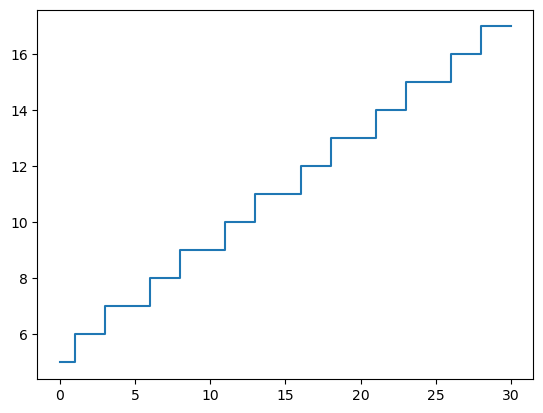

In [5]:
G2 = nx.DiGraph(G)
num_iterations = 30
maxflow = [nx.flow.maximum_flow_value(G, 'o', 'd')] + [intervetion(G2) for i in range(1, num_iterations+1)]

plt.plot(np.arange(0, num_iterations+1), maxflow, drawstyle='steps-post')
plt.show()

You are given the possibility of adding to the network a directed link $e_8$ with capacity $c_8 = 1$
and $x > 0$ extra units of capacity $(x ∈ Z)$. Where should you add the link and how should
you distribute the additional capacity in order to maximize the throughput that can be sent
from o to d? Plot the maximum throughput from $o$ to $d$ as a function of $x ≥ 0$.

> **Answer**: The most straightforward solution is to introduce a direct link between $o$ and $d$, introducing the whole capacity in it. It would intuitively act as an "highway" of flow.
>
> This comes directly from mincut-maxflow theorem, as by definition of "cut" we have that $\mathbb{U}$ must always contain the node o, and conversley $\mathbb{U}^{c}$ must always contain node d. As such, introducing a link between these two will always result in an out-boundary edge, being relevant for *any* cut that can be found in the network; it then act as "universal" capacity increaser, as we can simply add all capacity there and virtually increase the capacity of *all* cuts simoultaneously, including the bottleneck.
>
> If instead we would have proceeded by introducing the link between some other nodes, we would have, in the best cases, resolved the local cut to not be a bottleneck anymore, but then another would have appeared around the network. With the solution we propose this would have not virtually happened as such link would have been shared by all cuts, tho without effectively modifying the "ranking" of best/worse cuts.

Alterantively, once can still distribute flow as done according to previous *intervention()* algorithm; neverthless, the link $o-d$ will be much frequently intervened on, as it will always be part of all cuts.

Increasing edge ('o', 'd') with capacity: 1 by 1...
Increasing edge ('o', 'd') with capacity: 2 by 1...
Increasing edge ('c', 'd') with capacity: 2 by 1...
Increasing edge ('a', 'd') with capacity: 3 by 1...
Increasing edge ('o', 'a') with capacity: 3 by 1...
Increasing edge ('o', 'd') with capacity: 3 by 1...
Increasing edge ('c', 'd') with capacity: 3 by 1...
Increasing edge ('b', 'c') with capacity: 3 by 1...
Increasing edge ('o', 'b') with capacity: 3 by 1...
Increasing edge ('a', 'd') with capacity: 4 by 1...
Increasing edge ('o', 'a') with capacity: 4 by 1...
Increasing edge ('o', 'd') with capacity: 4 by 1...
Increasing edge ('c', 'd') with capacity: 4 by 1...
Increasing edge ('b', 'c') with capacity: 4 by 1...
Increasing edge ('o', 'b') with capacity: 4 by 1...
Increasing edge ('a', 'd') with capacity: 5 by 1...
Increasing edge ('o', 'a') with capacity: 5 by 1...
Increasing edge ('o', 'd') with capacity: 5 by 1...
Increasing edge ('c', 'd') with capacity: 5 by 1...
Increasing e

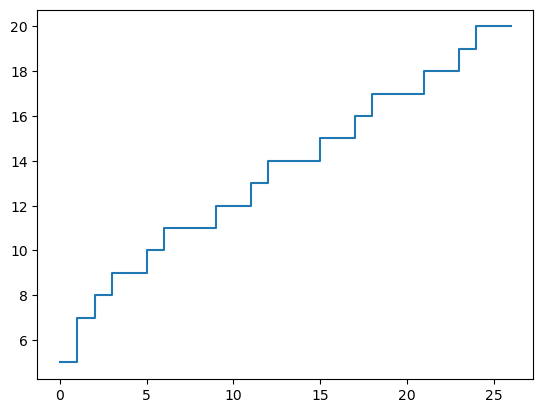

In [6]:
G3 = nx.DiGraph(G)
G3.add_edges_from([
    ('o', 'd', {'capacity': 1}),
])

num_iterations = 26
maxflow = [nx.flow.maximum_flow_value(G, 'o', 'd')] + [intervetion(G3) for i in range(1, num_iterations+1)]

plt.plot(np.arange(0, num_iterations+1), maxflow, drawstyle='steps-post')
plt.show()

### Exercise 2

Consider the simple graph in figure below

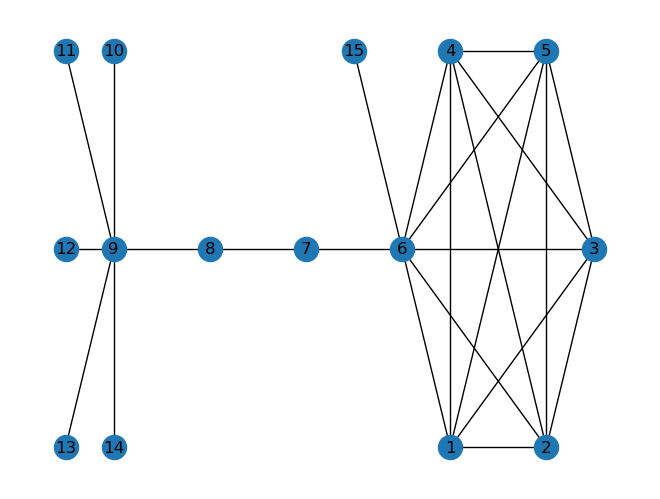

In [7]:
star = nx.star_graph(np.arange(8, 15))
star = nx.relabel_nodes(
    star,
    mapping={
        8: 9,
        9: 8,    
    }
)
star.add_node(7)
star.add_edge(8, 7)

complete = nx.complete_graph(np.arange(1, 7))
complete.add_node(15)
complete.add_edge(6, 15)

G = nx.compose(complete, star)
G.add_edge(
    6, 7   
)

pos = {
    # Star graph (left side)
    9: (0, 0),
    10: (0, 1),
    11: (-1, 1),
    12: (-1, 0), 
    13: (-1, -1),
    14: (0, -1),

    # Linking chain (middle)
    8: (2, 0),
    7: (4, 0),

    # Complete graph (right) 
    6: (6, 0),
    1: (7, -1),
    2: (9, -1),
    3: (10, 0),
    4: (7, 1),
    5: (9, 1),

    # Extra node attached to n6
    15: (5, 1)
}

nx.draw(G, with_labels=True, pos=pos)

Compute the Katz centrality, with $β = 0.15$ and uniform intrinsic centrality $\mu$.

In [8]:
def katz(G, beta=0.15, mu=None, tol=1e-5):

    N = len(G.nodes)
    W = nx.adjacency_matrix(G)
    W = W.toarray()

    w,v = np.linalg.eig(W)
    w = w.real

    lambda_max = max(w) 

    if mu is None:
        mu = np.ones((N,1))/N

    z_0 = np.ones((N,1))/N
    z_old = z_0

    while True:
        z_new = W.T @ z_old * (1-beta)/lambda_max + beta * mu
        if np.linalg.norm(z_new-z_old) < tol:
            break
        z_old=z_new

    zk_approx = z_new

    zk_approx = zk_approx / sum(zk_approx)
    return zk_approx

Write a distributed algorithm for the computation of Page-rank centrality, with $β = 0.15$ and
uniform intrinsic centrality $\mu$

In [9]:
# **Remark**: Notice that the proposed method is **distributed**, 
# i.e., the operations at single node levels do not require a complete
# knowledge of the network. Each node $i$ updates its state $z_i(t+1)$
# by using only local information, i.e., the i-th row of $W$ and the
# state $z_j(t)$ of nodes $j$ that are adjacent to $j$.

def pagerank(G, beta=0.15, mu=None, tol=1e-5):

    # ! Is this really distributed? As it still needs to know N, P, W, D, ... 
    N = len(G.nodes)
    W = nx.adjacency_matrix(G)
    W = W.toarray()
    D = np.diag(W.sum(axis=1))
    P = np.linalg.inv(D) @ W

    w,v = np.linalg.eig(W)
    w = w.real

    if mu is None:
        mu = np.ones((N,1))/N

    z_0 = np.ones((N,1))/N
    z_old = z_0

    while True:
        z_new = P.T @ z_old * (1-beta) + beta * mu
        if np.linalg.norm(z_new-z_old) < tol:
            break
        z_old=z_new

    zb_approx = z_new

    zb_approx = zb_approx / sum(zb_approx)
    return zb_approx

In [10]:
def draw_centralities(G, capacities):
    nx.draw(G, pos,
            with_labels=True,
            nodelist=G.nodes,
            node_size = [d*10000 for d in capacities],  
            node_color=list(capacities),
            font_size=8,
            cmap=plt.cm.Reds,
            )

[[0.11813757]
 [0.11813757]
 [0.11813757]
 [0.11813757]
 [0.11813757]
 [0.13007854]
 [0.03892977]
 [0.04281285]
 [0.03172152]
 [0.02430452]
 [0.02430452]
 [0.02430452]
 [0.02430452]
 [0.02430452]
 [0.04424685]]


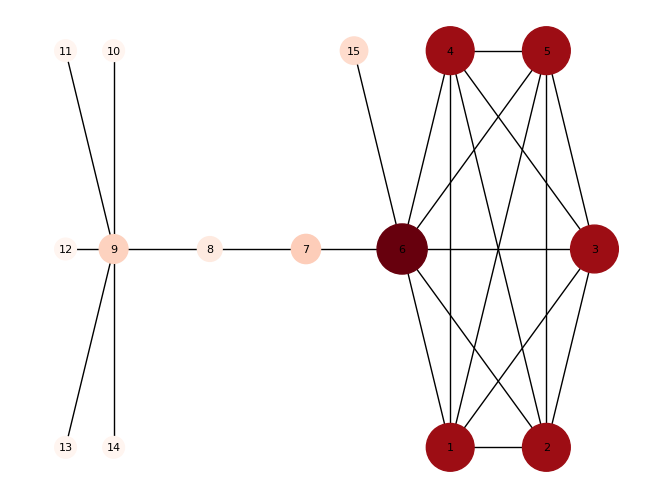

In [11]:
katzz = katz(G)
print(katzz)
draw_centralities(G, katzz)

[[0.07467977]
 [0.07467977]
 [0.07467977]
 [0.07467977]
 [0.07467977]
 [0.11445073]
 [0.0238975 ]
 [0.19404103]
 [0.05815016]
 [0.03749024]
 [0.03749024]
 [0.03749024]
 [0.03749024]
 [0.03749024]
 [0.04861054]]


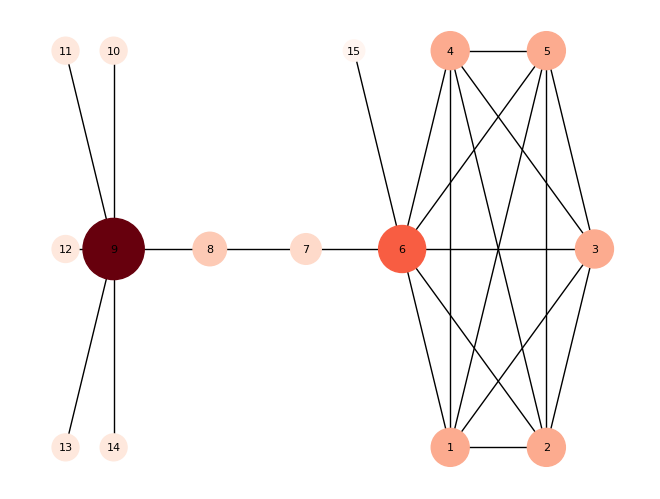

In [12]:
pagez = pagerank(G)
print(pagez)
draw_centralities(G, pagez)

Explain the results of points (a) and (b), focusing on the centralities of nodes n6 and n9

> *Answer:*
> ...

Compute the Page-Rank centrality with uniform intrinsic centrality $µ$ and for every $β ∈ {0, 1/4, 1/2, 3/4, 1}$

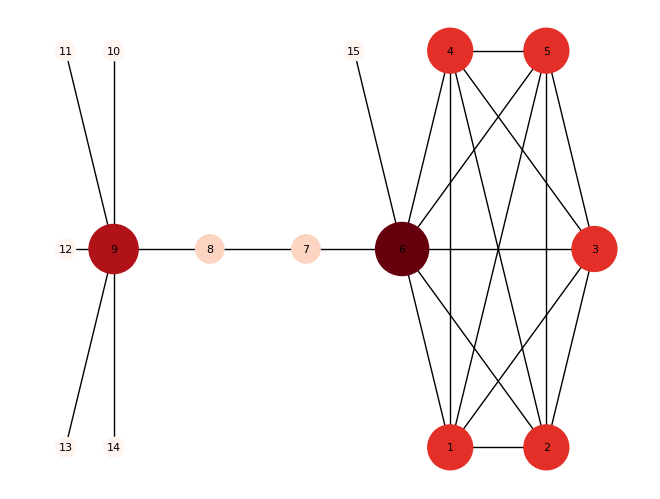

In [13]:
draw_centralities(G, pagerank(G, 0.0))

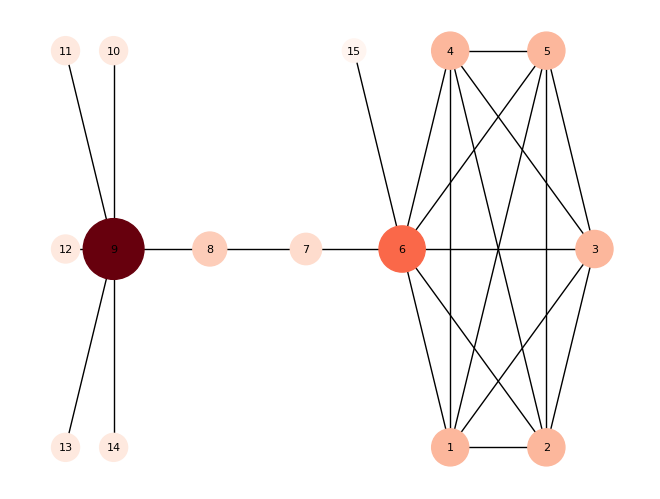

In [14]:
draw_centralities(G, pagerank(G, 0.25))

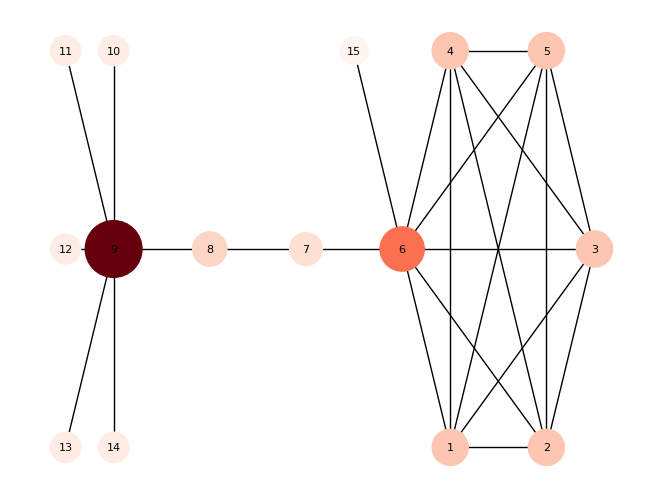

In [15]:
draw_centralities(G, pagerank(G, 0.50))

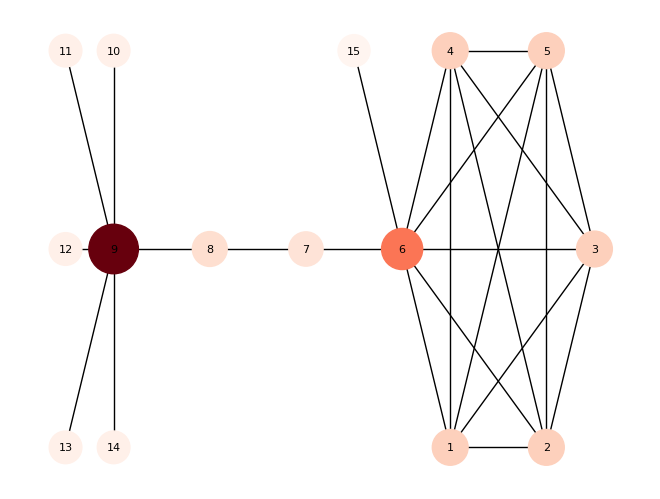

In [16]:
draw_centralities(G, pagerank(G, 0.75))

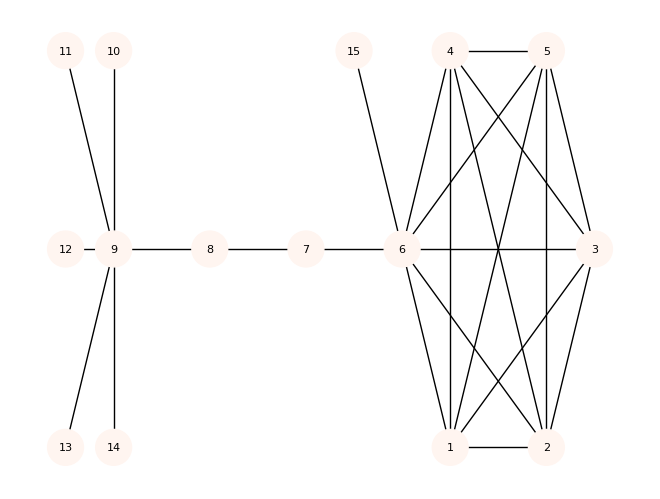

In [17]:
draw_centralities(G, pagerank(G, 1.0))

n6z=[array([0.14583373]), array([0.11060469]), array([0.10140379]), array([0.08750669]), array([0.06666667])]
n9z=[array([0.04166773]), array([0.05963718]), array([0.06119261]), array([0.0629146]), array([0.06666667])]


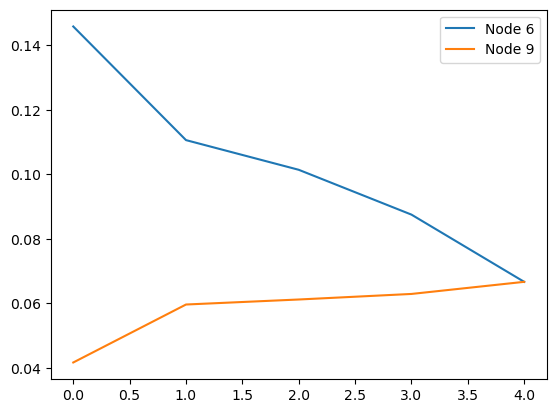

In [18]:
betas = [0.0, 0.25, 0.5, 0.75, 1.0]
n6z, n9z = [], []
for beta in betas:
    pagez = pagerank(G, beta)
    n6z.append(pagez[5])
    n9z.append(pagez[8])

print(f"{n6z=}")
print(f"{n9z=}")

plt.plot(np.arange(len(betas)), n6z, label='Node 6')
plt.plot(np.arange(len(betas)), n9z, label='Node 9')
plt.legend()
plt.show()

Is the difference between the centrality of node $n_6$ and node $n_9$ monotone in $β$? Explain the
results, focusing in particular on the extreme values of $β$.

> *Answer:* ...

### Exercise 3

Adding link 1 -> 2	with capacity=np.uint16(8741), length=np.float64(0.1621)
Adding link 2 -> 3	with capacity=np.uint16(9864), length=np.float64(0.0554)
Adding link 3 -> 4	with capacity=np.uint16(13350), length=np.float64(0.129)
Adding link 4 -> 5	with capacity=np.uint16(10926), length=np.float64(0.18667)
Adding link 1 -> 6	with capacity=np.uint16(13707), length=np.float64(0.12983)
Adding link 6 -> 7	with capacity=np.uint16(6960), length=np.float64(0.078333)
Adding link 7 -> 8	with capacity=np.uint16(7422), length=np.float64(0.094)
Adding link 8 -> 9	with capacity=np.uint16(6678), length=np.float64(0.057333)
Adding link 9 -> 13	with capacity=np.uint16(6297), length=np.float64(0.14167)
Adding link 2 -> 7	with capacity=np.uint16(11102), length=np.float64(0.10517)
Adding link 3 -> 8	with capacity=np.uint16(8899), length=np.float64(0.10667)
Adding link 3 -> 9	with capacity=np.uint16(8970), length=np.float64(0.10483)
Adding link 4 -> 9	with capacity=np.uint16(9753), length=np.float64(0.11233

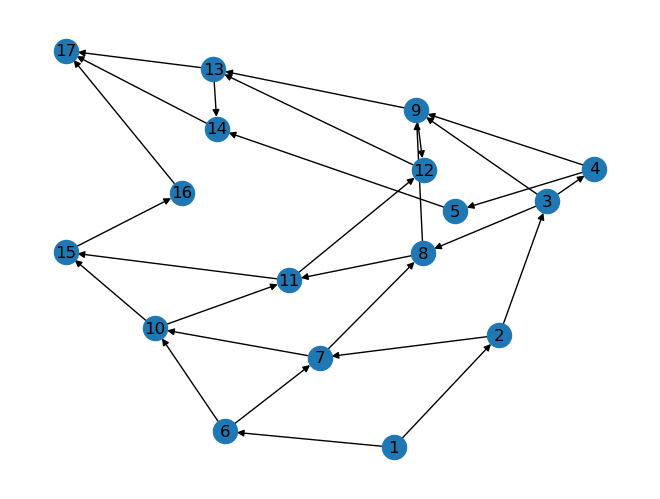

In [19]:
B = sp.io.loadmat('traffic.mat')["traffic"]
l = sp.io.loadmat('traveltime.mat')["traveltime"].reshape(28,)
C = sp.io.loadmat('capacities.mat')["capacities"].reshape(28,)
f = sp.io.loadmat('flow.mat')["flow"].reshape(28,)

G = nx.DiGraph()

for edge, length, capacity in zip(B.T, l, C):
    tail_ndx = edge.argmax()
    head_ndx = edge.argmin()
    print(f"Adding link {tail_ndx+1} -> {head_ndx+1}\twith {capacity=}, {length=}")
    G.add_edge((tail_ndx+1), (head_ndx+1), capacity=int(capacity), length=length,)

nx.draw(G, pos=nx.spring_layout(G, seed=0) , with_labels=True)

Find the shortest path between node 1 and 17. This is equivalent to the fastest path (path
with shortest traveling time) in an empty network

In [20]:
nx.shortest_path(G, 1, 17, weight='length')

[1, np.int64(2), np.int64(3), np.int64(9), np.int64(13), 17]

Find the maximum flow between node 1 and 17.

In [21]:
nx.flow.maximum_flow_value(G, 1, 17, capacity='capacity')

22448

Given the flow vector in flow.mat, compute the vector ν satisfying Bf = ν

In [22]:
nu = B @ f
print(nu)

[ 16806   8570  19448   4957   -746   4768    413     -2  -5671   1169
     -5  -7131   -380  -7412  -7810  -3430 -23544]


In the following, we assume that the exogenous inflow is zero in all the nodes except for node $1$, for which $ν_1$ has the same value computed in the point (c), and node $17$, for which $ν_{17} = −ν_1$

In [23]:
nu_opt = np.zeros_like(nu)
nu_opt[0] = nu[0]
nu_opt[16] = -nu[0]
nu_war = np.array(nu_opt)
print(nu_opt)

[ 16806      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0 -16806]


Find the social optimum $f^∗$ with respect to the delays on the different links $τ_e(f_e)$.

For this, minimize the cost function given by:

In [24]:
tau = lambda f, l, c : l / (1-f/c)
phi = lambda f, l, c : f * tau(f, l, c)
phi2 = lambda f, l, c : (l * c)/(1-f/c) - l*c

In [25]:
import cvxpy as cp

# Construct the problem
n_edges = B.shape[1]
f_opt = cp.Variable(n_edges)
obj_opt = cp.Minimize(
    cp.sum(cp.multiply(cp.multiply(l, C), cp.power(1 - cp.multiply(f_opt, cp.inv_pos(C)), -1)) - cp.multiply(l, C))
)
const_opt = [B @ f_opt == nu_opt, f_opt >=0]
prob_opt = cp.Problem(obj_opt, const_opt)

# Solve the problem
cost_opt = prob_opt.solve()
flow_opt = f_opt.value
print("Social optimal flow:", flow_opt)
print("Optimal cost:", cost_opt)

Social optimal flow: [6.56907062e+03 5.80995360e+03 3.04698945e+03 3.04698824e+03
 1.02369294e+04 4.66654551e+03 3.06120752e+03 2.59602544e+03
 3.10454824e+03 7.59117020e+02 5.54831028e-03 2.76295860e+03
 1.21273799e-03 3.04698824e+03 5.57038388e+03 2.89387933e+03
 5.04095956e+03 2.36445501e+03 4.65187627e+02 2.25443701e+03
 3.35906561e+03 5.61350262e+03 2.37192213e+03 1.34336223e-03
 6.34612873e+03 5.41891037e+03 5.04096090e+03 5.04096090e+03]
Optimal cost: 26142.669632064764


Find the Wardrop equilibrium

In [26]:
# Construct the problem
n_edges = B.shape[1]
f_war = cp.Variable(n_edges)
obj_war = cp.Minimize(
    cp.sum(-1 * cp.multiply(cp.multiply(l, C), cp.log(1 - cp.multiply(f_war, cp.inv_pos(C)))))
) # ! Can't use ln as there is only log
const_war = [B @ f_war == nu_opt, f_war >=0]
prob_war = cp.Problem(obj_war, const_war)

# Solve the problem
cost_war = prob_war.solve()
flow_war = f_war.value
print("Social optimal flow:", flow_war)
print("Optimal cost:", cost_war)

Social optimal flow: [6.55751467e+03 6.30859496e+03 2.20068429e+03 2.20068425e+03
 1.02484853e+04 4.70680271e+03 2.86025022e+03 2.23271312e+03
 3.34991379e+03 2.48919712e+02 1.16301054e+01 4.09628057e+03
 3.49910159e-05 2.20068425e+03 5.54168260e+03 2.34297965e+03
 5.29417516e+03 2.09547221e+03 6.39167207e+02 2.97907992e+03
 2.98214680e+03 5.96122672e+03 2.52239436e+03 5.31840610e-05
 6.78874616e+03 4.72307861e+03 5.29417521e+03 5.29417521e+03]
Optimal cost: 15731.952634448438
